# Временные ряды

- https://www.codeflow.site/ru/article/a-guide-to-time-series-visualization-with-python-3
- https://habr.com/ru/company/ods/blog/327242/
- https://habr.com/ru/post/207160/



_Временной ряд_ – это последовательность значений, описывающих протекающий во времени процесс, измеренных в последовательные моменты времени, обычно через равные промежутки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm

Рассматриваем встроенный датасет в  statsmodels.

Мы будем работать с набором данных, который называется «Атмосферный CO2 из непрерывных проб воздуха в обсерватории Мауна-Лоа, Гавайи, США», который собирал образцы CO2 с марта 1958 года по декабрь 2001 года. 

In [3]:
data = sm.datasets.co2.load_pandas()
co2 = data.data

In [4]:
co2.head(10)

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
1958-05-03,316.9
1958-05-10,NaN
1958-05-17,317.5
1958-05-24,317.9
1958-05-31,NaN


In [6]:
#Проверка, что индексы датафрейма - даты
co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

In [7]:
#Объединение данных по месяцам (заменой средним значением)
y = co2['co2'].resample('MS').mean()

In [8]:
y[0:10]

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
1958-08-01    314.950000
1958-09-01    313.500000
1958-10-01           NaN
1958-11-01    313.425000
1958-12-01    314.700000
Freq: MS, Name: co2, dtype: float64

In [9]:
#Пример просмотра данных за год 
y['1995-10-01':'1996-10-01']

1995-10-01    357.850
1995-11-01    359.475
1995-12-01    360.700
1996-01-01    362.025
1996-02-01    363.175
1996-03-01    364.060
1996-04-01    364.700
1996-05-01    365.325
1996-06-01    364.880
1996-07-01    363.475
1996-08-01    361.320
1996-09-01    359.400
1996-10-01    359.625
Freq: MS, Name: co2, dtype: float64

In [10]:
#Не все данные есть в датасете
y.isnull().sum()

5

In [11]:
#Таких нашлось - 5. Заменим их ближайшим к ним значением. Метод fillna заполняет NaN значения. 
y = y.fillna(y.bfill())


## Визуализация данных временных рядов

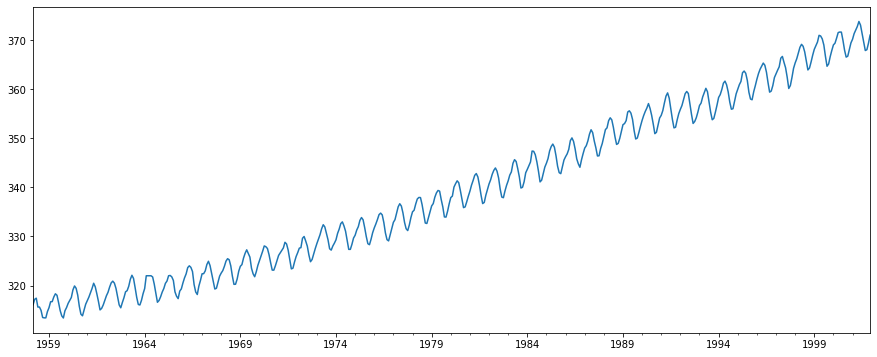

In [12]:
#Простой график. Используем методы DataFrame
y.plot(figsize=(15, 6))
plt.show()

При работе с данными временных рядов многое можно выявить путем их визуализации. Несколько вещей, на которые стоит обратить внимание:

* сезонность : _Дает ли отображение данных четкой периодической структуры? _
* тренд : _ следуют ли данные по последовательному наклону вверх или вниз? _
* noise : _ есть ли какие-либо выбросы или пропущенные значения, которые не соответствуют остальным данным? _

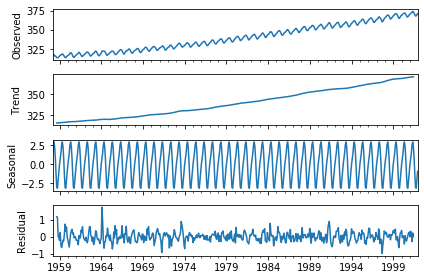

In [13]:
#Декомпозиция ряда по трем составляющим от библиотеки statsmodel
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

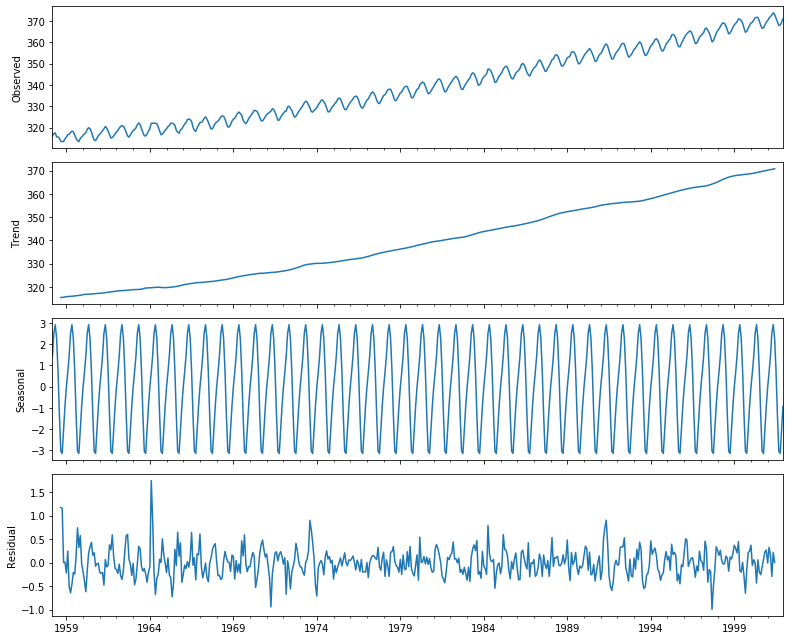

In [15]:
#Улучшаем вид графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
fig = decomposition.plot()
plt.show()

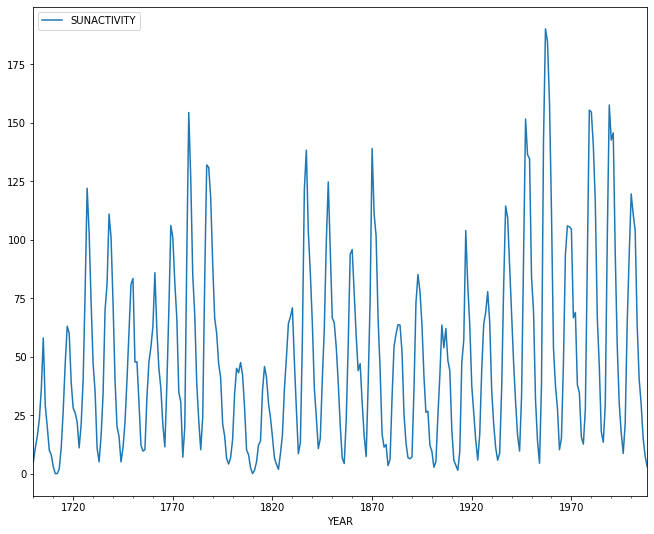

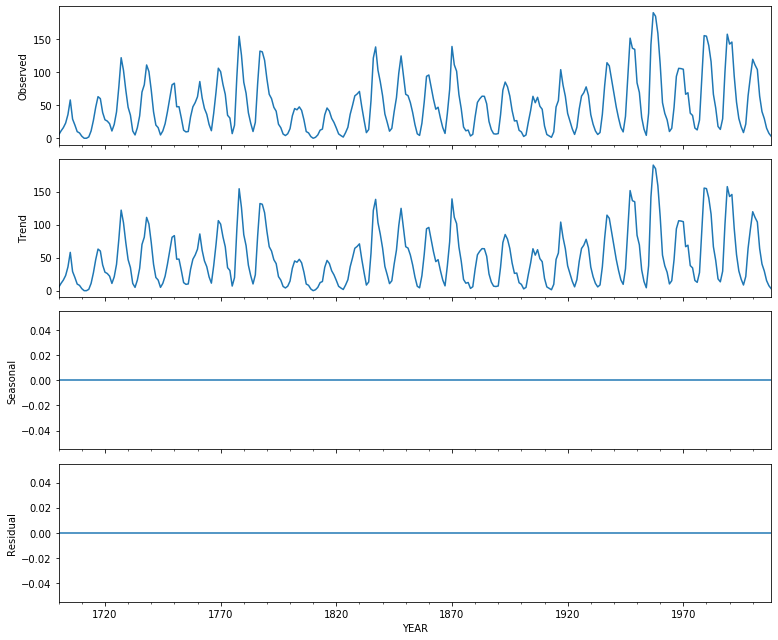

In [95]:
#Пример 2
data2=sm.datasets.sunspots.load_pandas()
sunspots=data2.data

#Борьба с датами
sunspots.index
sunspots["YEAR"]=pd.to_datetime(sunspots["YEAR"],format="%Y",exact=True)

sunspots.index=sunspots["YEAR"]
sunspots.drop(columns="YEAR",axis=1,inplace=True)

#sunspots.plot(x="YEAR",y="SUNACTIVITY")
sunspots.plot()
plt.show()

decomposition = sm.tsa.seasonal_decompose(sunspots, model='additive')
fig = decomposition.plot()
plt.show()


# Пример 3


https://towardsdatascience.com/analyzing-time-series-data-in-pandas-be3887fdd621



In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# чтобы не писать plt.show()
%matplotlib inline 

from pylab import rcParams
rcParams['figure.figsize'] = 12, 9 #Размер окна для графиков


In [104]:
data_set=pd.read_csv("international-airline-passengers.csv")

In [105]:
data_set.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [106]:
data_set.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [107]:
data_set.dtypes

Month         object
Passengers     int64
dtype: object

In [108]:
data_set["Month"]=pd.to_datetime(data_set["Month"])
data_set.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [109]:
data_set.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [112]:
data_set=data_set.set_index("Month")

In [113]:
data_set.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


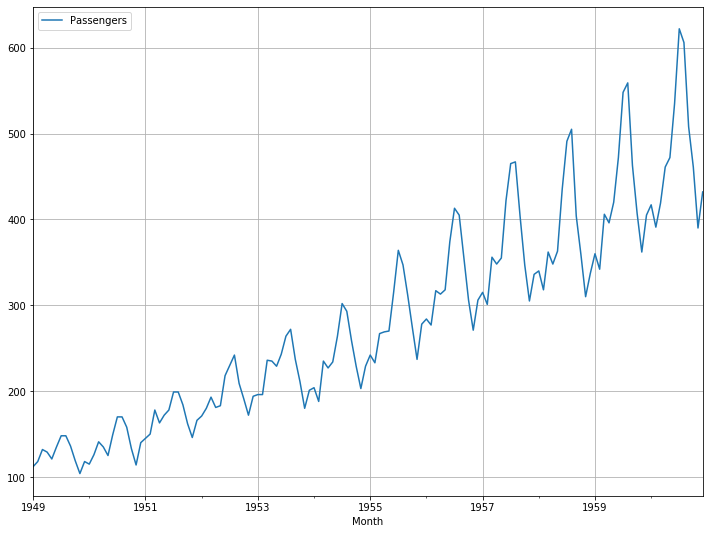

In [114]:
data_set.plot(grid=True)

There are a couple of models to consider during the Decomposition of Time Series data.
1. Additive Model: This model is used when the variations around the trend does not vary with the level of the time series. Here the components of a time series are simply added together using the formula:
__y(t) = Level(t) + Trend(t) + Seasonality(t) + Noise(t)__
2. Multiplicative Model: Is used if the trend is proportional to the level of the time series. Here the components of a time series are simply multiplied together using the formula:
__y(t) = Level(t) * Trend(t) * Seasonality(t) *Noise(t)__

For the sake of this tutorial, we will use the additive model because it is quick to develop, fast to train, and provide interpretable patterns. We also need to import statsmodels which has a tsa (time series analysis) package as well as the seasonal_decompose() function we need:

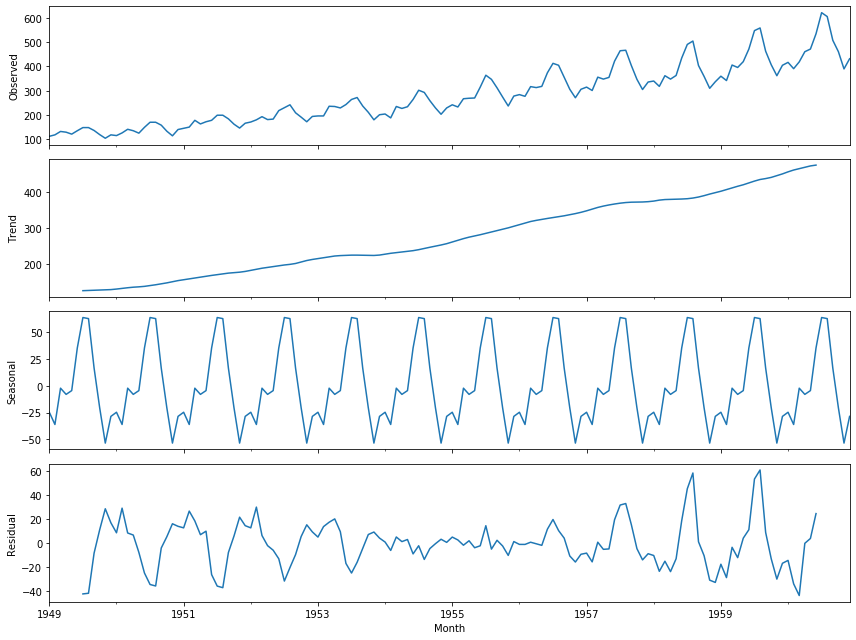

In [115]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data_set, model='additive')
fig = decomposition.plot()


One last thing we will do is plot the trend alongside the observed time series. To do this, we will use Matplotlib’s .YearLocator() function to set each year to begin from the month of January month=1 , and month as the minor locator showing ticks for every 3 months (intervals=3). Then we plot our dataset (and gave it blue color) using the index of the dataframe as x-axis and the number of Passengers for the y-axis.
We did the same for the trend observations which we plotted in red color.

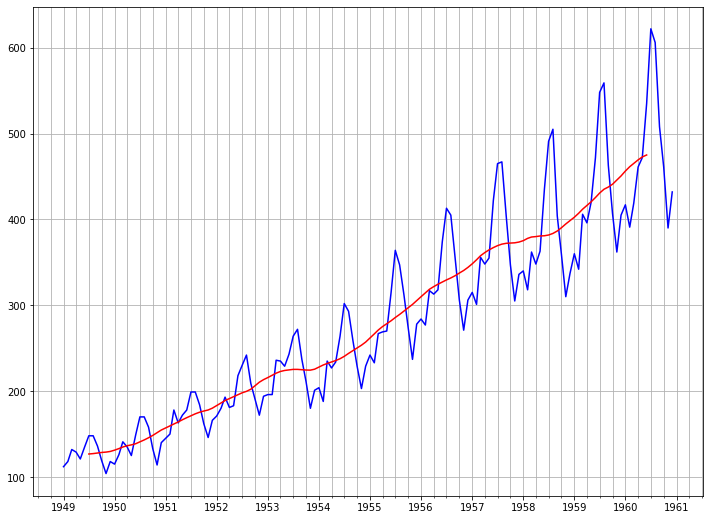

In [121]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)

ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

plt.plot(data_set.index, data_set['Passengers'], c='blue')

plt.plot(decomposition.trend.index, decomposition.trend, c='red')

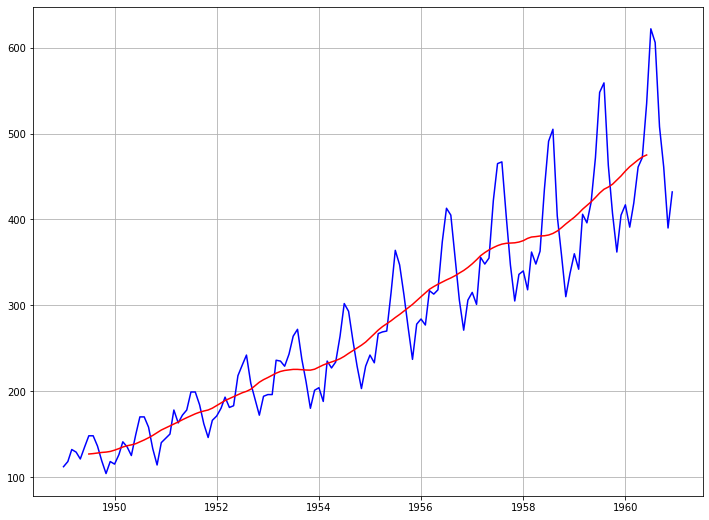

In [124]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.grid(True)



plt.plot(data_set.index, data_set['Passengers'], c='blue')

plt.plot(decomposition.trend.index, decomposition.trend, c='red')

#  Пример 4 (прогноз) 

https://habr.com/ru/company/ods/blog/327242/



In [125]:
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt

In [127]:
#Код для отрисовки графика
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#from plotly import graph_objs as go
#init_notebook_mode(connected = True)

def plotly_df(df, title = ''):
    data = []

    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)

    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

In [154]:
#Загружаем датасет
dataset = pd.read_csv('hour_online.csv', index_col=['Time'], parse_dates=['Time'])


In [155]:
dataset.head()

,Users
Time,
2017-01-01 00:00:00,34002
2017-01-01 01:00:00,37947
2017-01-01 02:00:00,41517
2017-01-01 03:00:00,44476
2017-01-01 04:00:00,46234


In [129]:
plotly_df(dataset, title = "Online users")

NameError: name 'go' is not defined

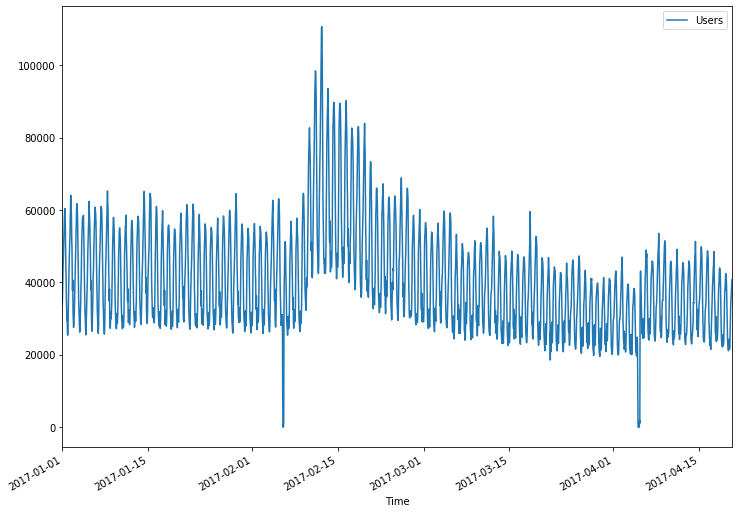

In [130]:
dataset.plot()

In [131]:
#Функция замены следующего значения средним (по n-значениям)
def moving_average(series, n):
    return np.average(series[-n:])

moving_average(dataset.Users, 24)

29858.333333333332

In [132]:
#Сглаживание данных
#Формируем новые набор, сглаживая данные и рисуем график
def plotMovingAverage(series, n):
    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()

    # При желании, можно строить и доверительные интервалы для сглаженных значений
    #rolling_std =  series.rolling(window=n).std()
    #upper_bond = rolling_mean+1.96*rolling_std
    #lower_bond = rolling_mean-1.96*rolling_std

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    #plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    #plt.plot(lower_bond, "r--")
    plt.plot(dataset[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

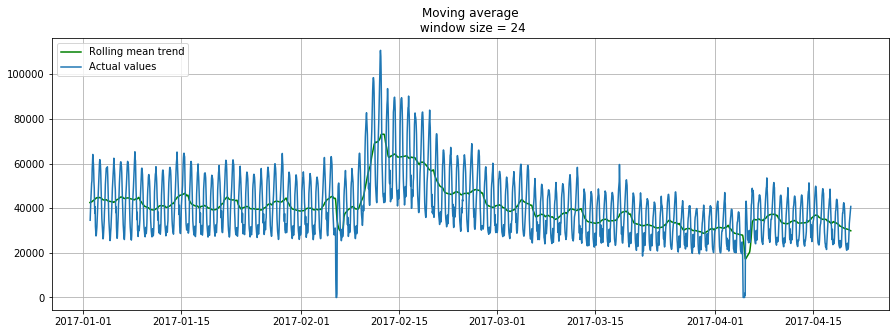

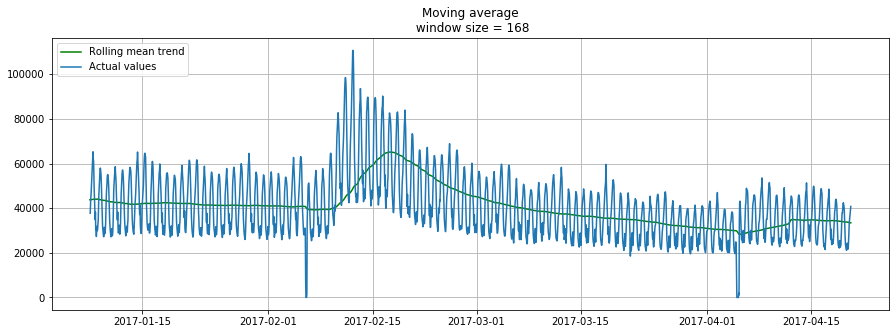

In [133]:
plotMovingAverage(dataset, 24) # сглаживаем по дням
plotMovingAverage(dataset, 24*7) # сглаживаем по неделям

## Простое экспоненциальное сглаживание

$$\hat{y}_{t} = \alpha \cdot y_t + (1-\alpha) \cdot \hat y_{t-1}$$

In [134]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result


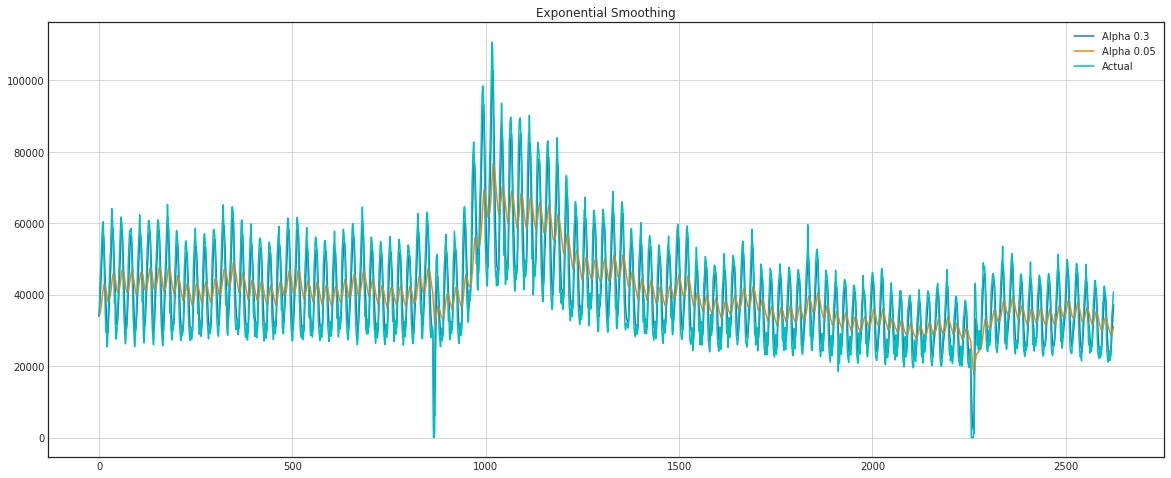

In [135]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.3, 0.05]:
        plt.plot(exponential_smoothing(dataset.Users, alpha), label="Alpha {}".format(alpha))
    plt.plot(dataset.Users.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)

## Двойное экспоненциальное сглаживание 

Учет тренда


$$\ell_x = \alpha y_x + (1-\alpha)(\ell_{x-1} + b_{x-1})\\ b_x = \beta(\ell_x - \ell_{x-1}) + (1-\beta)b_{x-1}\\ \hat{y}_{x+1} = \ell_x + b_x$$

In [136]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # прогнозируем
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

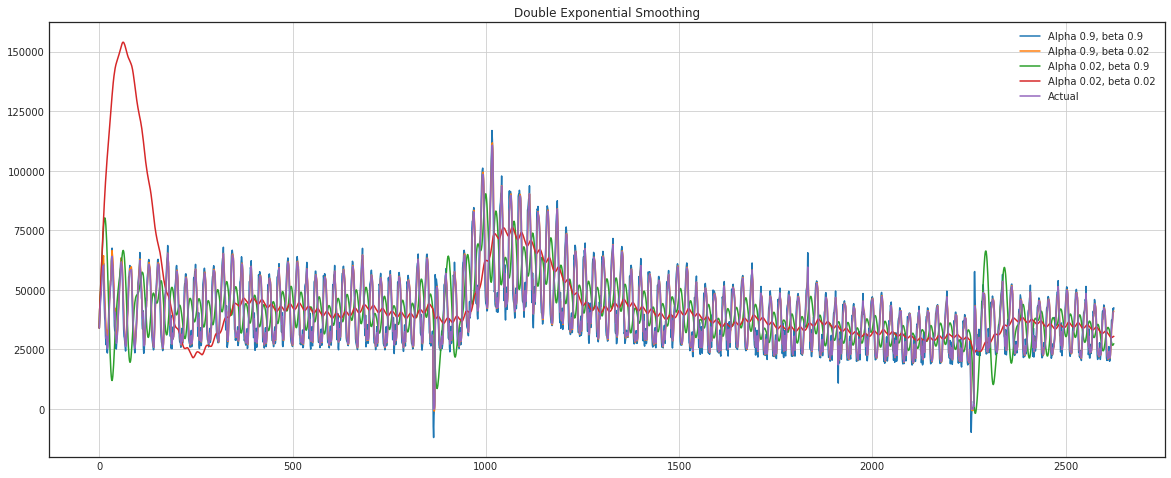

In [137]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.9, 0.02]:
        for beta in [0.9, 0.02]:
            plt.plot(double_exponential_smoothing(dataset.Users, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(dataset.Users.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

## Тройное экспоненциальное сглаживание a.k.a. Holt-Winters

Учет тренда и сезонности

$$\ell_x = \alpha(y_x - s_{x-L}) + (1-\alpha)(\ell_{x-1} + b_{x-1})\\ b_x = \beta(\ell_x - \ell_{x-1}) + (1-\beta)b_{x-1}\\ s_x = \gamma(y_x - \ell_x) + (1-\gamma)s_{x-L}\\ \hat{y}_{x+m} = \ell_x + mb_x + s_{x-L+1+(m-1)modL}$$

In [138]:
class HoltWinters:

    """
    Модель Хольта-Винтерса с методом Брутлага для детектирования аномалий
    https://fedcsis.org/proceedings/2012/pliks/118.pdf

    # series - исходный временной ряд
    # slen - длина сезона
    # alpha, beta, gamma - коэффициенты модели Хольта-Винтерса
    # n_preds - горизонт предсказаний
    # scaling_factor - задаёт ширину доверительного интервала по Брутлагу (обычно принимает значения от 2 до 3)

    """

    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor

    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  

    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # вычисляем сезонные средние
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # вычисляем начальные значения
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []

        seasonals = self.initial_seasonal_components()

        for i in range(len(self.series)+self.n_preds):
            if i == 0: # инициализируем значения компонент
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])

                self.PredictedDeviation.append(0)

                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                continue
            if i >= len(self.series): # прогнозируем
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])

                # во время прогноза с каждым шагом увеличиваем неопределенность
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 

            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])

                # Отклонение рассчитывается в соответствии с алгоритмом Брутлага
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])

            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i % self.slen])

In [139]:
#Код для кросс-валидации 
from sklearn.model_selection import TimeSeriesSplit

def timeseriesCVscore(x):
    # вектор ошибок
    errors = []

    values = data.values
    alpha, beta, gamma = x

    # задаём число фолдов для кросс-валидации
    tscv = TimeSeriesSplit(n_splits=3) 

    # идем по фолдам, на каждом обучаем модель, строим прогноз на отложенной выборке и считаем ошибку
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen = 24*7, alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()

        predictions = model.result[-len(test):]
        actual = values[test]
        error = mean_squared_error(predictions, actual)
        errors.append(error)

    # Возвращаем средний квадрат ошибки по вектору ошибок 
    return np.mean(np.array(errors))

In [141]:
%%time
data = dataset.Users[:-500] # отложим часть данных для тестирования

# инициализируем значения параметров
x = [0, 0, 0] 

# Минимизируем функцию потерь с ограничениями на параметры
opt = minimize(timeseriesCVscore, x0=x, method="TNC", bounds = ((0, 1), (0, 1), (0, 1)))

# Из оптимизатора берем оптимальное значение параметров
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

0.006634267064344168 0.0 0.0467652042896729
Wall time: 43.3 s


In [142]:
# Передаем оптимальные значения модели, 
data = dataset.Users
model = HoltWinters(data[:-128], slen = 24*7, alpha = alpha_final, beta = beta_final, gamma = gamma_final, n_preds = 128, scaling_factor = 2.56)
model.triple_exponential_smoothing()

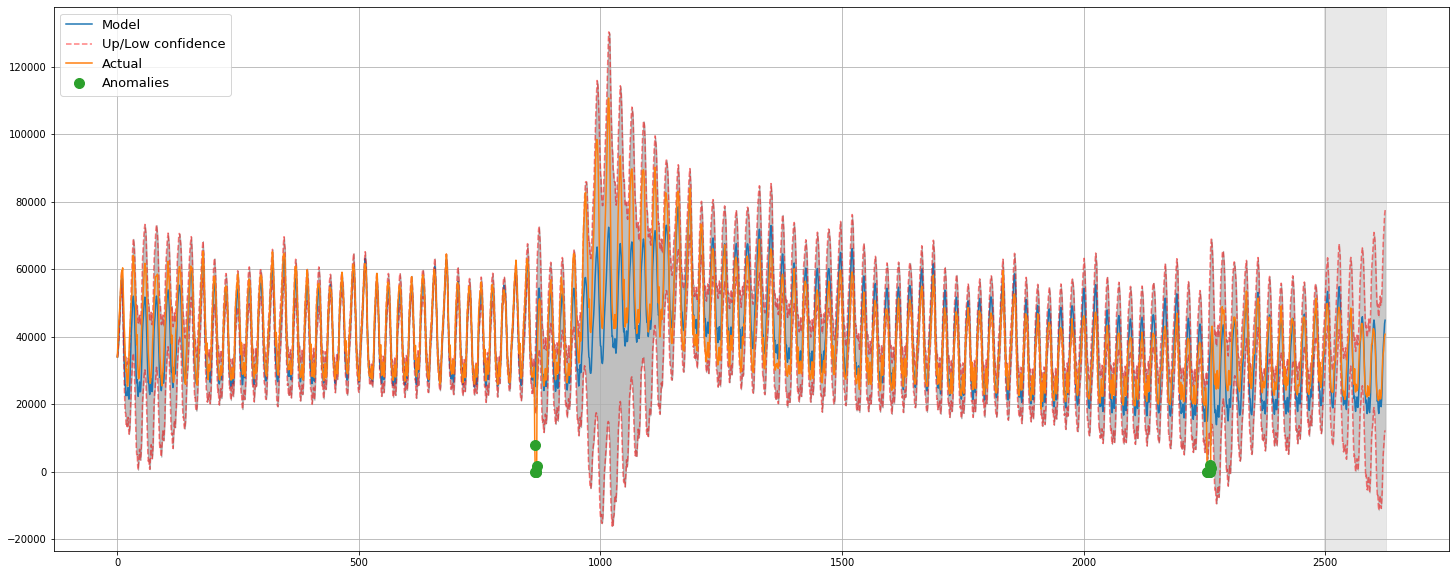

In [143]:
def plotHoltWinters():
    Anomalies = np.array([np.NaN]*len(data))
    Anomalies[data.values<model.LowerBond] = data.values[data.values<model.LowerBond]
    plt.figure(figsize=(25, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
    plt.plot(model.LowerBond, "r--", alpha=0.5)
    plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, y2=model.LowerBond, alpha=0.5, color = "grey")
    plt.plot(data.values, label = "Actual")
    plt.plot(Anomalies, "o", markersize=10, label = "Anomalies")
    plt.axvspan(len(data)-128, len(data), alpha=0.5, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);

plotHoltWinters()

## Линейные и не очень модели на временных рядах

In [145]:
#Добавление признаков во временной ряд - час, день недели, выходной или нет
data = pd.DataFrame(dataset)
data.columns = ["y"]

#data.index = data.index.to_datetime()
data["hour"] = data.index.hour
data["weekday"] = data.index.weekday
data['is_weekend'] = data.weekday.isin([5,6])*1
data.head()

,y,hour,weekday,is_weekend
Time,,,,
2017-01-01 00:00:00,34002,0,6,1
2017-01-01 01:00:00,37947,1,6,1
2017-01-01 02:00:00,41517,2,6,1
2017-01-01 03:00:00,44476,3,6,1
2017-01-01 04:00:00,46234,4,6,1


In [146]:
#Часы, недели и день недели - категориальные переменные как их кодировать ?
def code_mean(data, cat_feature, real_feature):
    """
    Возвращает словарь, где ключами являются уникальные категории признака cat_feature, 
    а значениями - средние по real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [147]:
code_mean(data, 'weekday', "y")

{0: 38730.143229166664,
 1: 38632.828125,
 2: 38128.518229166664,
 3: 39519.035135135135,
 4: 41505.15277777778,
 5: 43717.708333333336,
 6: 43392.14360313316}

In [163]:
#То же самое только в 1 функции с формированием тренировочного и проверочного сета
def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):
    
    data = pd.DataFrame(data.copy())
    data.columns = ["y"]
    
    # считаем индекс в датафрейме, после которого начинается тестовый отрезок
    test_index = int(len(data)*(1-test_size))
    
    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)
        
    
    #data.index = data.index.to_datetime()
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1
    
    # считаем средние только по тренировочной части, чтобы избежать лика
    #data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', "y").get, data.weekday))
    #data["hour_average"] = list(map(code_mean(data[:test_index], 'hour', "y").get, data.hour))

    # выкидываем закодированные средними признаки 
    data.drop(["hour", "weekday"], axis=1, inplace=True)

    data = data.dropna()
    data = data.reset_index(drop=True)
    
    
    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["y"], axis=1)
    y_train = data.loc[:test_index]["y"]
    X_test = data.loc[test_index:].drop(["y"], axis=1)
    y_test = data.loc[test_index:]["y"]
    
    return X_train, X_test, y_train, y_test

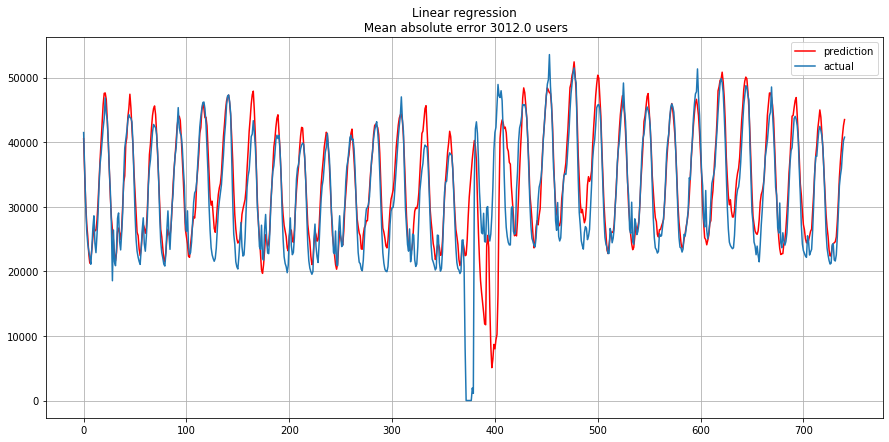

In [164]:
#Линейная регрессиия 

from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = prepareData(dataset, test_size=0.3, lag_start=12, lag_end=48)

lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {} users".format(round(mean_absolute_error(prediction, y_test))))
plt.grid(True);

In [165]:
def performTimeSeriesCV(X_train, y_train, number_folds, model, metrics):
    print('Size train set: {}'.format(X_train.shape))
    
    k = int(np.floor(float(X_train.shape[0]) / number_folds))
    print('Size of each fold: {}'.format(k))

    errors = np.zeros(number_folds-1)

    # loop from the first 2 folds to the total number of folds    
    for i in range(2, number_folds + 1):
        print()
        split = float(i-1)/i
        print('Splitting the first ' + str(i) + ' chunks at ' + str(i-1) + '/' + str(i) )

        X = X_train[:(k*i)]
        y = y_train[:(k*i)]
        print('Size of train + test: {}'.format(X.shape)) # the size of the dataframe is going to be k*i

        index = int(np.floor(X.shape[0] * split))
        
        # folds used to train the model        
        X_trainFolds = X[:index]        
        y_trainFolds = y[:index]
        
        # fold used to test the model
        X_testFold = X[(index + 1):]
        y_testFold = y[(index + 1):]
        
        model.fit(X_trainFolds, y_trainFolds)
        errors[i-2] = metrics(model.predict(X_testFold), y_testFold)

    
    # the function returns the mean of the errors on the n-1 folds    
    return errors.mean()

In [166]:
performTimeSeriesCV(X_train, y_train, 5, lr, mean_absolute_error)



Size train set: (1838, 37)
Size of each fold: 367

Splitting the first 2 chunks at 1/2
Size of train + test: (734, 37)

Splitting the first 3 chunks at 2/3
Size of train + test: (1101, 37)

Splitting the first 4 chunks at 3/4
Size of train + test: (1468, 37)

Splitting the first 5 chunks at 4/5
Size of train + test: (1835, 37)


4936.33298491295